<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align=center><font size = 5>Boston Housing Data Analysis</font></h1>

<br>

**Project Scenario**: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?
- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

---

### Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| CRIM|	per capita crime rate by town|
| ZN|	proportion of residential land zoned for lots over 25,000 sq.ft.|
| INDUS| proportion of non-retail business acres per town.	|
| CHAS| Charles River dummy variable (1 if tract bounds river; 0 otherwise)	|
| NOX|	nitric oxides concentration (parts per 10 million)|
| RM|	average number of rooms per dwelling|
| AGE|	proportion of owner-occupied units built prior to 1940 |
| DIS|	weighted distances to five Boston employment centres |
| RAD|	index of accessibility to radial highways |
| TAX |	full-value property-tax rate per 10,000  |
| PTRATIO |	 pupil-teacher ratio by town|
| LSTAT|  lower status of the population|
| MEDV | Median value of owner-occupied homes in 1000s|

---

In [64]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [45]:
# importing data
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

# creating dataframe
boston_df = pd.read_csv(boston_url, index_col=0)

In [46]:
# first rows
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [47]:
# the dataset has 506 observations and 13 variables
boston_df.shape

(506, 13)

## Exploratory Data Analysis
---

In [48]:
# data summary
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


In [49]:
# summary measures of quantitative variables
boston_df.describe(percentiles = [.25, .5, .75, .95, .99]).round(2).T.style.background_gradient(cmap='PuBu')

,count,mean,std,min,25%,50%,75%,95%,99%,max
CRIM,506.000000,3.610000,8.600000,0.010000,0.080000,0.260000,3.680000,15.790000,41.370000,88.980000
ZN,506.000000,11.360000,23.320000,0.000000,0.000000,0.000000,12.500000,80.000000,90.000000,100.000000
INDUS,506.000000,11.140000,6.860000,0.460000,5.190000,9.690000,18.100000,21.890000,25.650000,27.740000
CHAS,506.000000,0.070000,0.250000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
NOX,506.000000,0.550000,0.120000,0.380000,0.450000,0.540000,0.620000,0.740000,0.870000,0.870000
RM,506.000000,6.280000,0.700000,3.560000,5.890000,6.210000,6.620000,7.590000,8.330000,8.780000
AGE,506.000000,68.570000,28.150000,2.900000,45.020000,77.500000,94.070000,100.000000,100.000000,100.000000
DIS,506.000000,3.800000,2.110000,1.130000,2.100000,3.210000,5.190000,7.830000,9.220000,12.130000
RAD,506.000000,9.550000,8.710000,1.000000,4.000000,5.000000,24.000000,24.000000,24.000000,24.000000
TAX,506.000000,408.240000,168.540000,187.000000,279.000000,330.000000,666.000000,666.000000,666.000000,711.000000


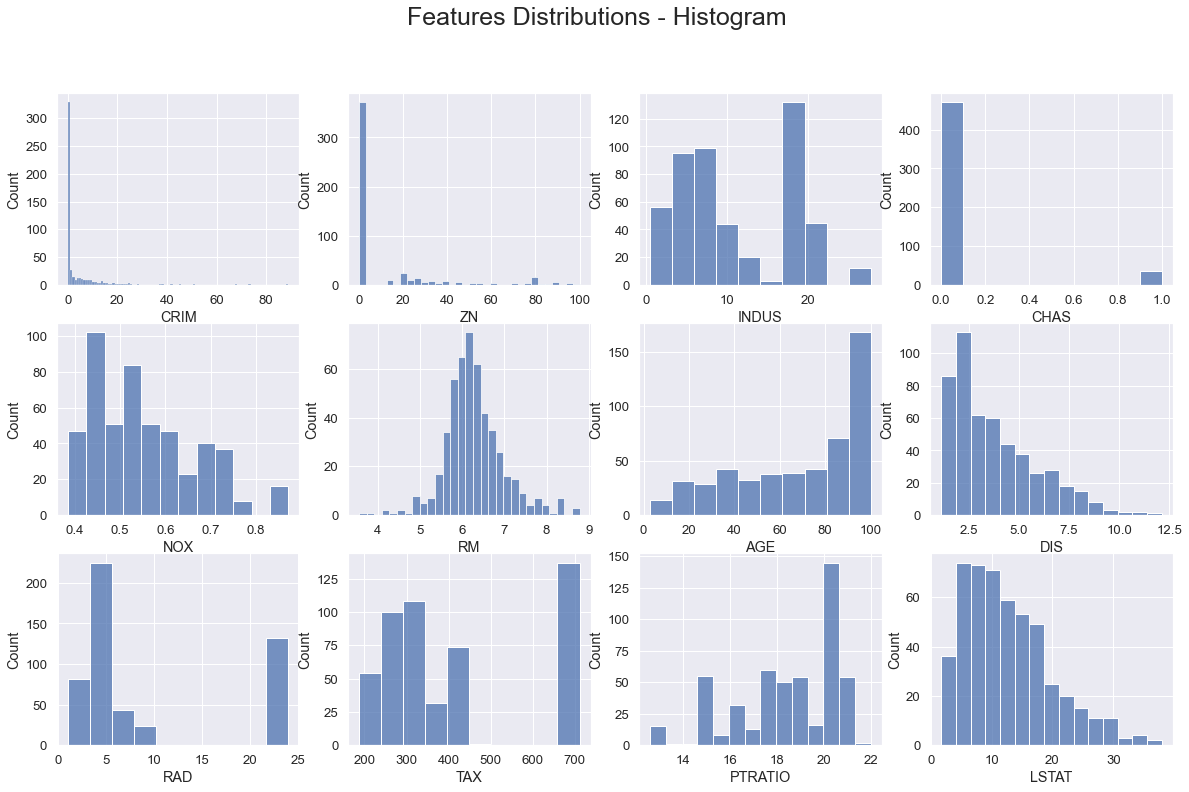

In [50]:
sns.set(font_scale=1.2)
fig, eixo = plt.subplots(3,4,figsize=(20,12))

cont = 0
for linha in range(3):
    for coluna in range(4): 
        sns.histplot(data=boston_df, x=boston_df.columns[cont], ax=eixo[linha][coluna])
        cont += 1
        
plt.suptitle('Features Distributions - Histogram', ha='center', fontsize=25);

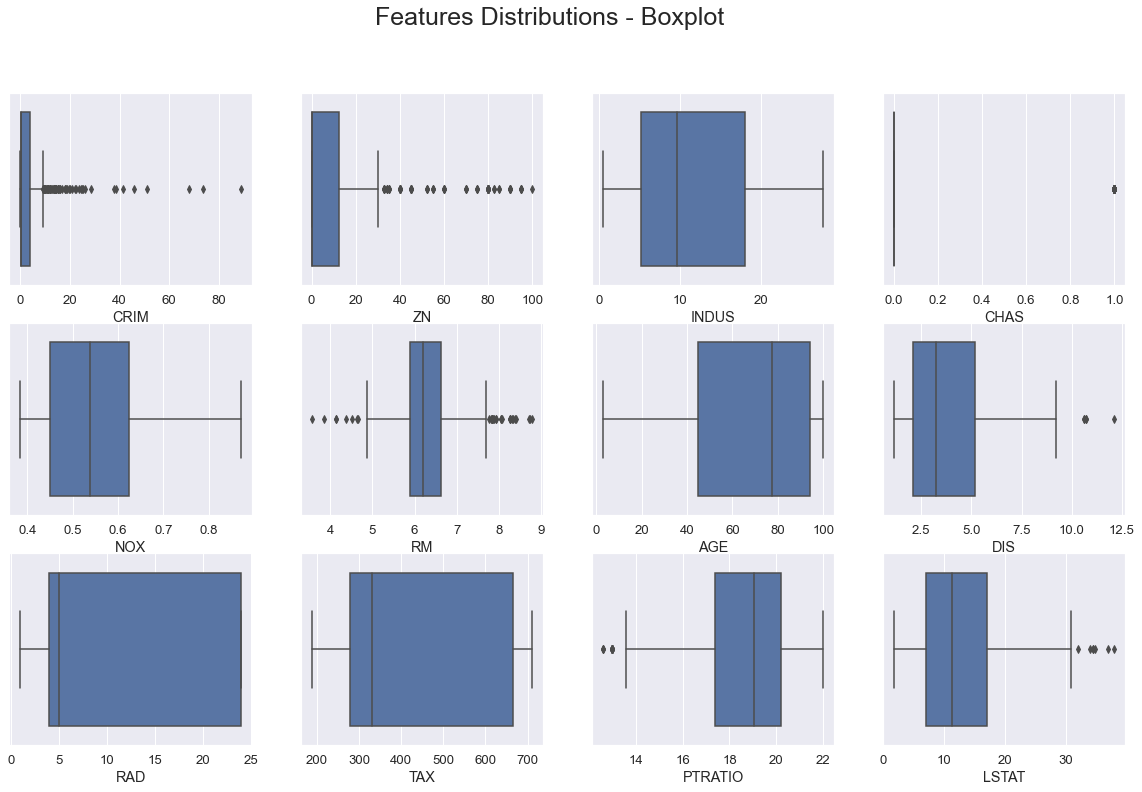

In [51]:
sns.set(font_scale=1.2)
fig, eixo = plt.subplots(3,4,figsize=(20,12))

cont = 0
for linha in range(3):
    for coluna in range(4): 
        sns.boxplot(data=boston_df, x=boston_df.columns[cont], ax=eixo[linha][coluna], orient='h')
        cont += 1

plt.suptitle('Features Distributions - Boxplot', ha='center', fontsize=25);

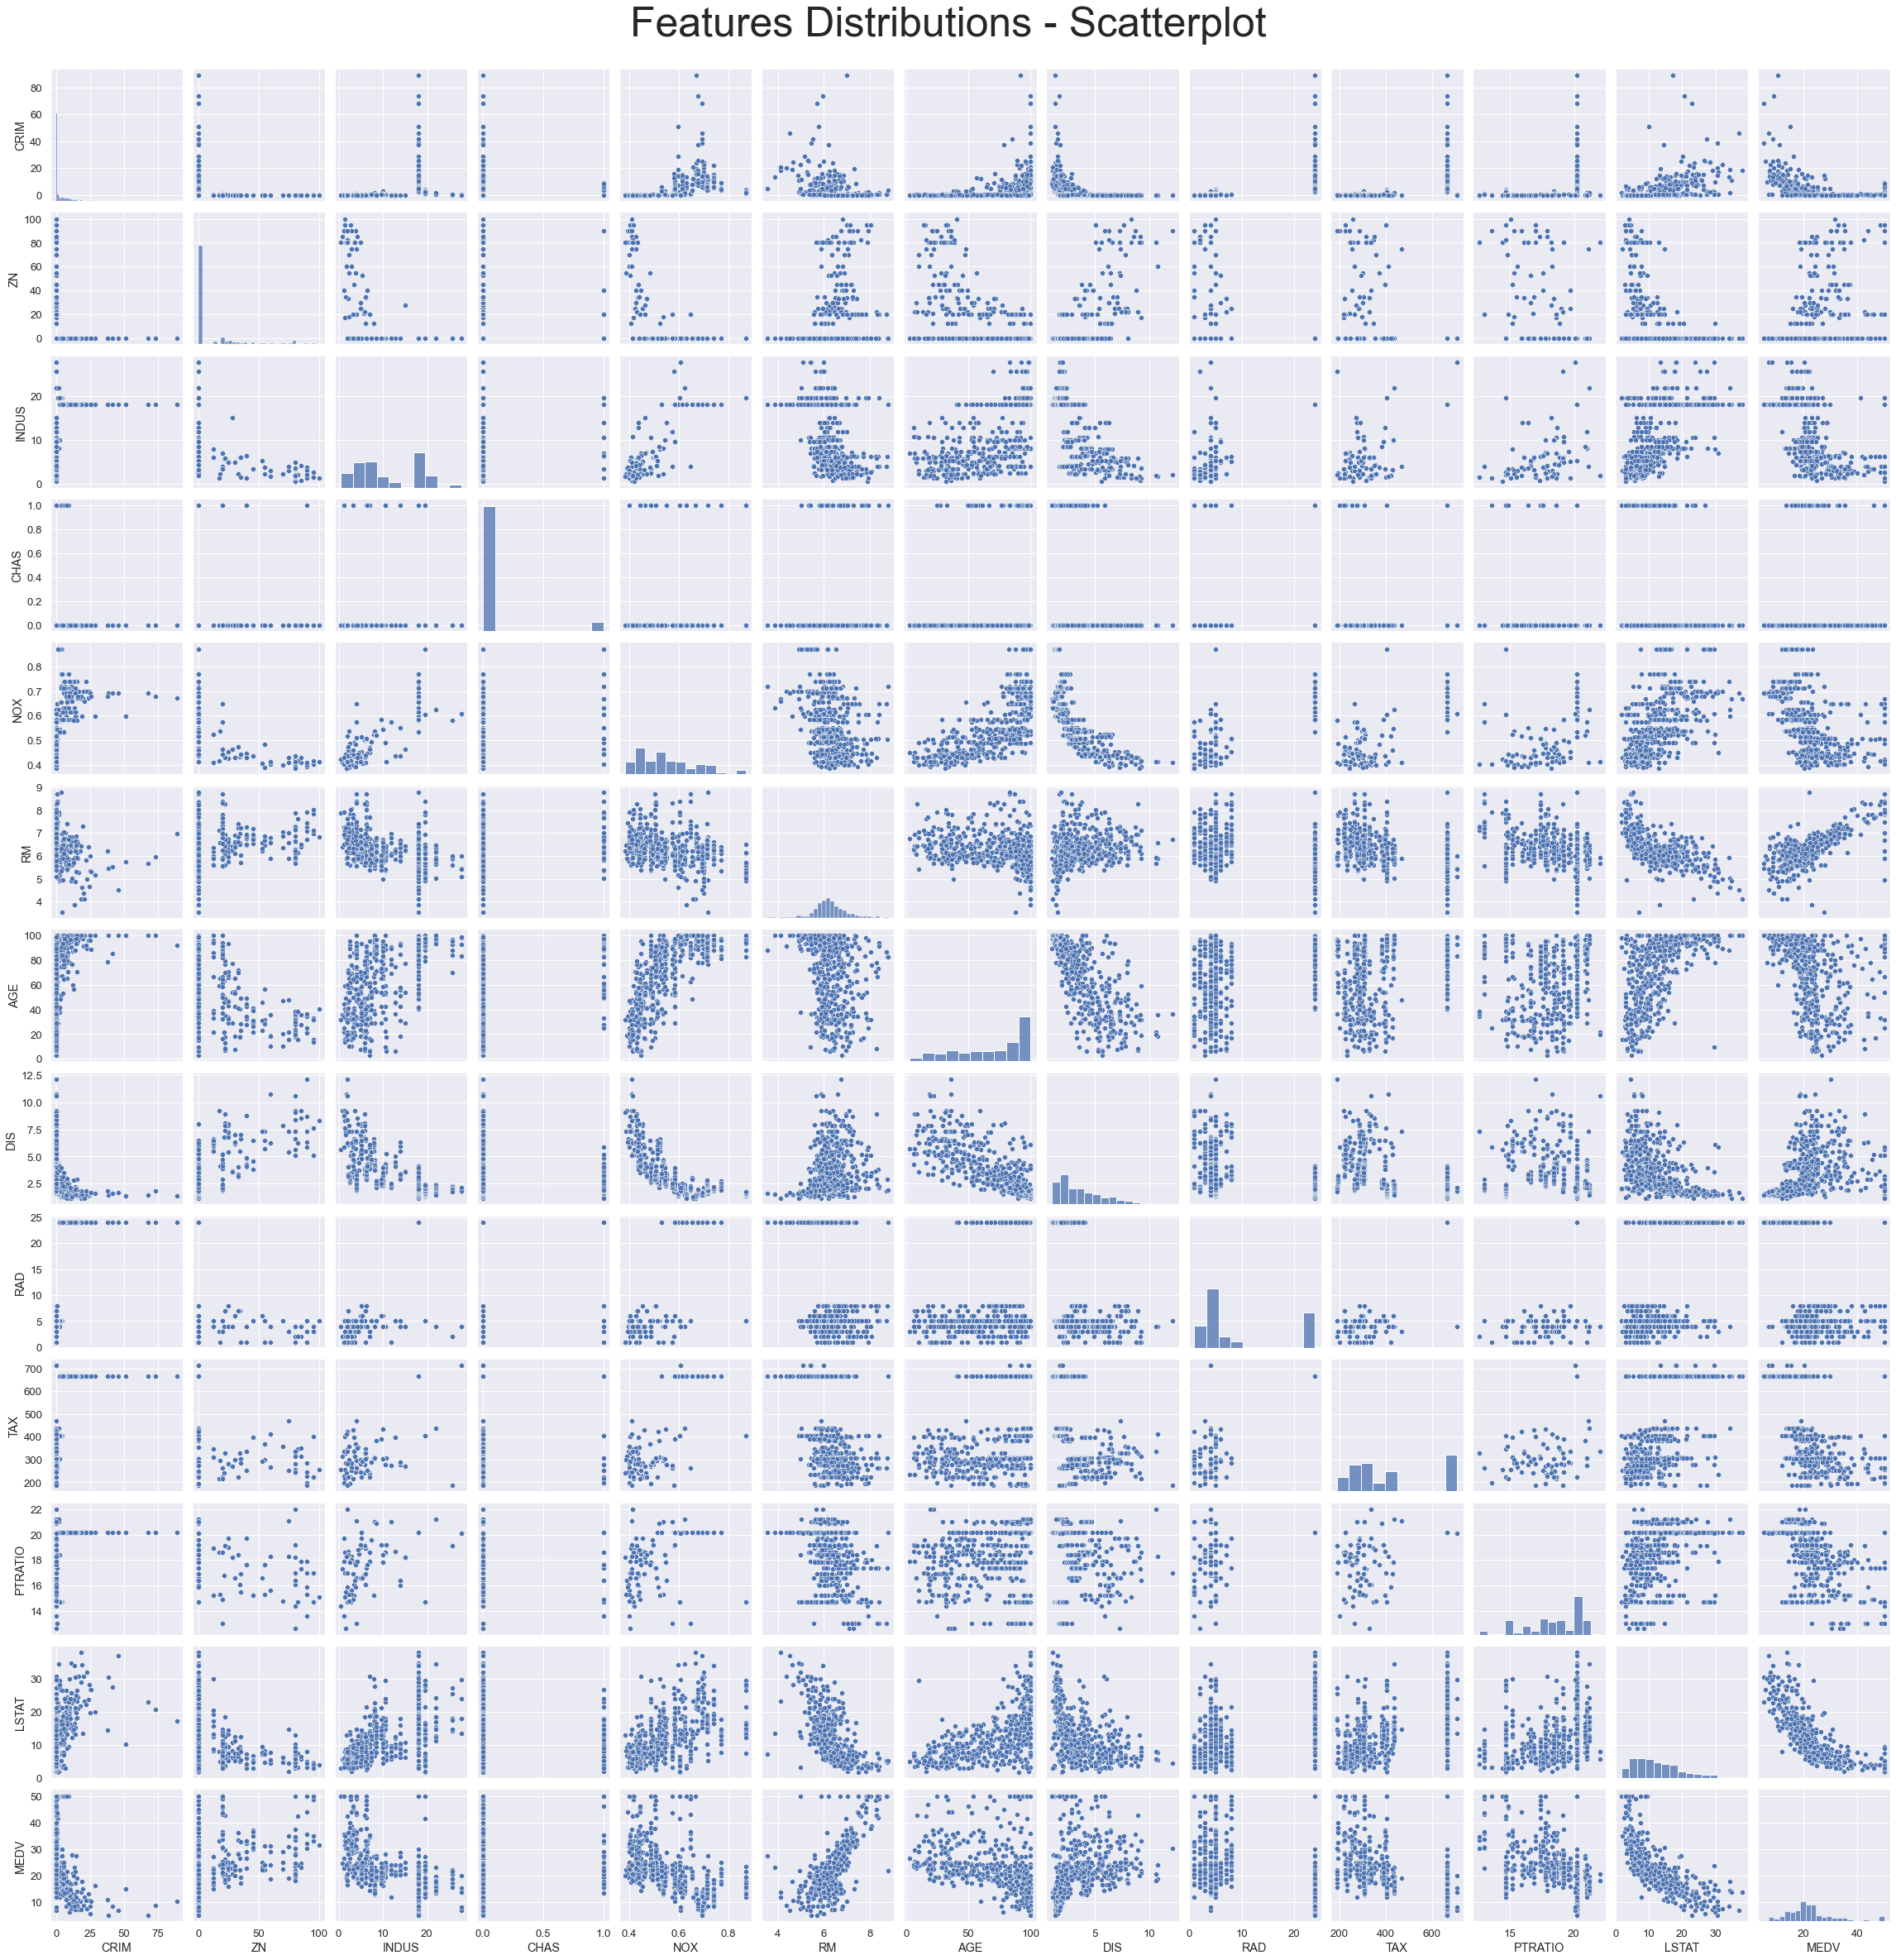

In [52]:
sns.pairplot(boston_df)
plt.suptitle('Features Distributions - Scatterplot', x=0.5, y=1.02, ha='center', fontsize=50);

## Project Tasks
---

**Question 1:** For the "Median value of owner-occupied homes" provide a boxplot.

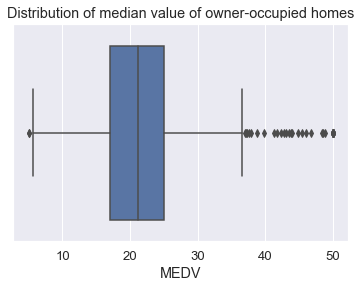

In [53]:
# presence of outliers after third quartile.

sns.boxplot(x=boston_df.MEDV)
plt.title('Distribution of median value of owner-occupied homes')
plt.show()

---
**Question 2:** Provide a bar plot for the Charles river variable.

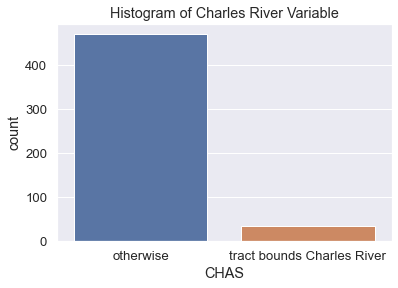

In [54]:
# Most of the houses have no tract bounds to the Charles River

ax = sns.countplot(data=boston_df, x='CHAS')
plt.title('Histogram of Charles River Variable')
ax.set_xticklabels(['otherwise', 'tract bounds Charles River'])
plt.show()

---
**Question 3:** Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older).

In [55]:
boston_df['AGE_GROUP'] = boston_df['AGE'].apply(lambda x: '35 years and younger' if x <= 35.0 
                                           else 'between 35 and 70 years' if (x > 35.0) & (x < 70.0)
                                           else '70 years and older')

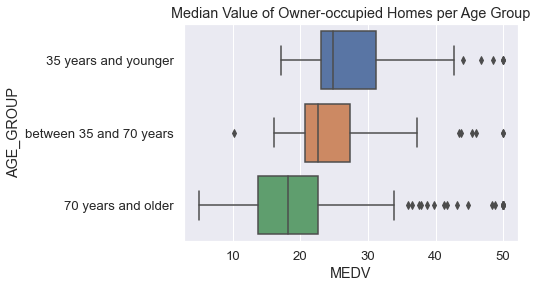

In [60]:
# On average, when the age is lower the median value of owner occupied homes is higher 

df = boston_df.sort_values(by='AGE')
sns.boxplot(x=df.MEDV, y=df.AGE_GROUP, data=df)
plt.title('Median Value of Owner-occupied Homes per Age Group')
plt.show()

---
**Question 4:** Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

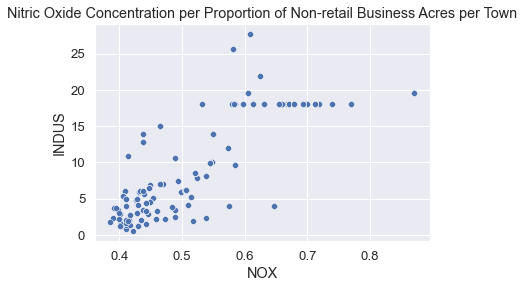

In [58]:
# The scatter plot indicates a correlation between 
# Nitric oxide concentration and proportion 
# of non-retail business acres per town

sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)
plt.title('Nitric Oxide Concentration per Proportion of Non-retail Business Acres per Town')
plt.show()

---
**Question 5:** Create a histogram for the pupil to teacher ratio variable.

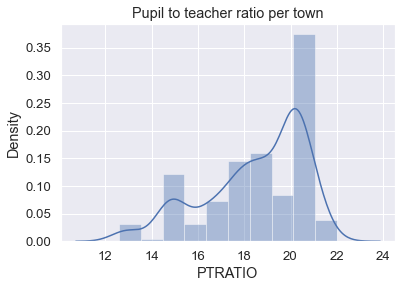

In [61]:
# Pupil to teacher ratio per town is highest at 20-21 range

sns.distplot(a=boston_df.PTRATIO, bins=10, kde=True)
plt.title('Pupil to teacher ratio per town')
plt.show()

## Statistics Tests 
---
**Question 6:** Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
Hypothesis:

($H_0$) ➞ There's no significant difference in median value between houses bounded and not bounded by the Charles River.

($H_1$) ➞ There's a significant difference in median value between houses bounded and not bounded by the Charles River.

In [69]:
CHAS_FAR  = boston_df[boston_df["CHAS"] == 0]["MEDV"]
CHAS_NEAR = boston_df[boston_df["CHAS"] == 1]["MEDV"]

scipy.stats.ttest_ind(CHAS_FAR, CHAS_NEAR, axis=0, equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

*P-value is more than alpha value of 0.05 so, we failed to reject $H_0$.*

---
**Question 7:** Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

($H_0$) ➞ There isn't statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940.

($H_1$) ➞ There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940.

In [70]:
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
AGE,1.0,6069.761065,6069.761065,83.477459,1.569982e-18
Residual,504.0,36646.534350,72.711378,NaN,NaN


*Given p-value is less than 0.05, we fail to accept $H_0$.*

---
**Question 8:** Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

($H_0$) ➞ Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town

($H_1$) ➞ Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

In [71]:
pearson, p_value = scipy.stats.pearsonr(boston_df.NOX ,boston_df.INDUS)
print('Pearson Coefficient value={0}, P-value={1}'.format(pearson, p_value))

Pearson Coefficient value=0.7636514469209162, P-value=7.913361061229697e-98


*Pearson Coefficient is 0.76365 and p-value less than 0.05, we reject $H_0$.*

---
**Question 9:** What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

($H_0$) ➞ Weighted distances to five Boston employment centres are not related to median value.

($H_1$) ➞ Weighted distances to five Boston employment centres are related to median value.

In [75]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predisction = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 06 Aug 2022   Prob (F-statistic):           1.21e-08
Time:                        13:01:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
print('Pearson Coefficient value={0}'.format(np.sqrt(0.062)))  

Pearson Coefficient value=0.24899799195977465


*Weak correlation between both features.*

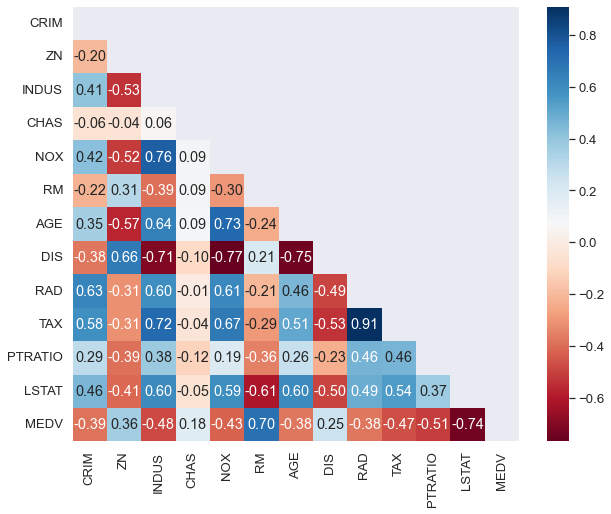

In [17]:
sns.set_context(font_scale=1.9)
plt.figure(figsize=(10,8))
sns.heatmap(
    boston_df.corr(), 
    annot=True, 
    fmt='.2f', 
    cmap='RdBu',
    mask=np.triu(
        np.ones_like(boston_df.corr()) 
    ) 
);

---